Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_20102019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,House_size,Living_alone,No_of_people_in_the_house,Time_living_in_barri,Barri_evolution,BCN_evolution,...,BCN_transport,Barri_problem_with_security,Barri_problem_with_streets_cleaning,Barri_problem_with_mobility,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,CIUTAT VELLA,1,1.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS IMPROVED,...,GOOD,0,0,0,1,0,0,0,0,0
1,0.0,CIUTAT VELLA,1,0.0,101-150 M2,0,TWO,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,GOOD,0,0,0,0,0,0,0,0,0
2,1.0,CIUTAT VELLA,1,0.0,51-100 M2,0,TWO,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT HAS WORSENED,IT HAS WORSENED,...,GOOD,0,0,0,0,0,1,0,0,0
3,0.0,CIUTAT VELLA,1,0.0,< 50 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,...,"NEITHER BAD, NOR GOOD",1,0,0,0,0,0,0,0,0
4,1.0,CIUTAT VELLA,0,0.0,< 50 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,GOOD,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(12758, 30)

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [8]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,11340,0
1.0,0,1418


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,741,160
EIXAMPLE,1914,164
GRÀCIA,921,88
HORTA - GUINARDÓ,1290,180
LES CORTS,1021,49
NOU BARRIS,1158,209
SANT ANDREU,940,149
SANT MARTÍ,1359,166
SANTS - MONTJUÏC,972,203


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,4446,526
1,6894,892


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0.0,5874,719
1.0,5466,699


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,1373,117
51-100 M2,7843,1058
< 50 M2,793,124
> 150 M2,496,40
I DON'T KNOW,835,79


Would_live_in_another_neighborhood,0.0,1.0
Living_alone,,
0,7919,985
1,3421,433


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
FOUR OR MORE,549,58
ONE,3421,433
THREE,1319,146
TWO,6051,781


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,1628,128
LESS THAN 10 YEARS,573,165
MORE THAN 10 YEARS,9139,1125


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,5962,573
IT HAS WORSENED,1984,465
IT IS THE SAME,3394,380


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,3733,371
IT HAS WORSENED,4266,698
IT IS THE SAME,3341,349


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,6375,608
IT WILL STAY THE SAME,3483,432
IT WILL WORSEN,1482,378


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,5906,645
IT WILL STAY THE SAME,2795,359
IT WILL WORSEN,2639,414


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,749,368
NOT SATISFIED,45,94
SATISFIED,10546,956


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,1090,238
NOT SATISFIED,106,21
SATISFIED,10144,1159


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,1528,363
GOOD,4707,423
"NEITHER BAD, NOR GOOD",5105,632


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,1766,293
GOOD,3171,320
"NEITHER BAD, NOR GOOD",6403,805


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,512,147
GOOD,5861,514
"NEITHER BAD, NOR GOOD",4967,757


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,972,162
GOOD,4918,486
"NEITHER BAD, NOR GOOD",5450,770


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",4250,868
ONE OF THE BEST,6852,317
ONE OF THE WORST,238,233


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,1240,232
GOOD,9104,1016
"NEITHER BAD, NOR GOOD",996,170


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,845,146
GOOD,9333,1109
"NEITHER BAD, NOR GOOD",1162,163


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,9650,1170
1,1690,248


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,10400,1317
1,940,101


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,10833,1361
1,507,57


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,10282,1280
1,1058,138


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,9649,1141
1,1691,277


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,10835,1076
1,505,342


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,10616,1279
1,724,139


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,11076,1339
1,264,79


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,10881,1276
1,459,142


In [9]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [10]:
x_var = [#'District',
 'Woman',
 'Car',
 'House_size',
 #'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 #'Barri_evolution',
 #'BCN_evolution',
 #'Barri_future',
 #'BCN_future',
 'Barri_satisfaction',
 #'BCN_satisfaction',
 'Barri_security',
 #'BCN_security',
 'Barri_management',
 #'BCN_management',
 'Barri_comparison',
 'Barri_transport']
 #'BCN_transport',
 #'Barri_problem_with_security',
 #'Barri_problem_with_streets_cleaning',
 #'Barri_problem_with_mobility']
 #'BCN_over_barri_evolution',
 #'BCN_over_barri_future',
 #'BCN_over_barri_satisfaction',
 #'BCN_over_barri_transport',
 #'BCN_over_barri_management',
 #'BCN_over_barri_security'

In [11]:
y = data['Would_live_in_another_neighborhood']

In [12]:
x = pd.get_dummies(data[x_var])

In [13]:
x.columns.tolist()

['Woman',
 'Car',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_FOUR OR MORE',
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE',
 'No_of_people_in_the_house_TWO',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_satisfaction_FAIRLY SATISFIED',
 'Barri_satisfaction_NOT SATISFIED',
 'Barri_satisfaction_SATISFIED',
 'Barri_security_BAD',
 'Barri_security_GOOD',
 'Barri_security_NEITHER BAD, NOR GOOD',
 'Barri_management_BAD',
 'Barri_management_GOOD',
 'Barri_management_NEITHER BAD, NOR GOOD',
 'Barri_comparison_NEITHER THE BEST, NOR THE WORST',
 'Barri_comparison_ONE OF THE BEST',
 'Barri_comparison_ONE OF THE WORST',
 'Barri_transport_BAD',
 'Barri_transport_GOOD',
 'Barri_transport_NEITHER BAD, NOR GOOD']

In [14]:
for i in ['House_size_< 50 M2',
 
 'No_of_people_in_the_house_ONE',
 
 'Time_living_in_barri_LESS THAN 10 YEARS',
 
 'Barri_satisfaction_SATISFIED',
 
 'Barri_security_GOOD',
 
 'Barri_management_GOOD',
 
 'Barri_comparison_ONE OF THE BEST',
 
 'Barri_transport_GOOD']:
    del x[i]

In [15]:
x = sm.add_constant(x)

# Logit

In [21]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12736
Model Family:                                Binomial   Df Model:                           21
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3726.9
Date:                                Sun, 09 May 2021   Deviance:                       7453.9
Time:                                        16:54:09   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3843      0.159    -14.961      0.000      -2.697      -2.072
Woman                                                            0.0662      0.066      1.007      0.314      -0.063       0.195
Car                                                              0.1505      0.069      2.186      0.029       0.016       0.285
House_size_101-150 M2                                           -0.1697      0.153     -1.111      0.267      -0.469       0.130
House_size_51-100 M2                                             0.0247      0.116      0.213      0.831      -0.202       0.252
House_size_> 150 M2                                             -0.1562      0.210     -0.744      0.457      -0.568       0.256
House_size_I DON'T KNOW                                         -0.3220      0.168     -1.921      0.055      -0.651       0.007
No_of_people_in_the_house_FOUR OR MORE                          -0.3790      0.163     -2.327      0.020      -0.698      -0.060
No_of_people_in_the_house_THREE                                 -0.1699      0.114     -1.490      0.136      -0.393       0.054
No_of_people_in_the_house_TWO                                   -0.0235      0.076     -0.309      0.758      -0.173       0.126
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.3938      0.141     -9.912      0.000      -1.669      -1.118
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9251      0.106     -8.758      0.000      -1.132      -0.718
Barri_satisfaction_FAIRLY SATISFIED                              1.1137      0.081     13.677      0.000       0.954       1.273
Barri_satisfaction_NOT SATISFIED                                 2.1175      0.208     10.181      0.000       1.710       2.525
Barri_security_BAD                                               0.1791      0.092      1.938      0.053      -0.002       0.360
Barri_security_NEITHER BAD, NOR GOOD                            -0.0502      0.072     -0.693      0.489      -0.192       0.092
Barri_management_BAD                                             0.1200      0.130      0.924      0.356      -0.135       0.375
Barri_management_NEITHER BAD, NOR GOOD                           0.0998      0.068      1.469      0.142      -0.033       0.233
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3151      0.071     18.405      0.000       1.175       1.455
Barri_comparison_ONE OF THE WORST                                2.33

In [22]:
glm_logit_results.aic

7497.865471573759

In [23]:
glm_logit_results.bic

-112951.18074638324

In [24]:
glm_logit_results.pvalues.sort_values(ascending=False)

House_size_51-100 M2                                            8.311418e-01
No_of_people_in_the_house_TWO                                   7.575827e-01
Barri_security_NEITHER BAD, NOR GOOD                            4.885630e-01
House_size_> 150 M2                                             4.571024e-01
Barri_management_BAD                                            3.556547e-01
Woman                                                           3.139619e-01
House_size_101-150 M2                                           2.665136e-01
Barri_management_NEITHER BAD, NOR GOOD                          1.418573e-01
No_of_people_in_the_house_THREE                                 1.363464e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.336606e-01
House_size_I DON'T KNOW                                         5.477803e-02
Barri_security_BAD                                              5.260029e-02
Car                                                             2.883969e-02

In [25]:
for i in ['House_size_> 150 M2', 'House_size_101-150 M2', 'House_size_51-100 M2', "House_size_I DON'T KNOW"]:
    del x[i]

In [26]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12740
Model Family:                                Binomial   Df Model:                           17
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3732.1
Date:                                Sun, 09 May 2021   Deviance:                       7464.2
Time:                                        16:54:09   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.4173      0.131    -18.428      0.000      -2.674      -2.160
Woman                                                            0.0501      0.065      0.765      0.444      -0.078       0.178
Car                                                              0.1483      0.068      2.176      0.030       0.015       0.282
No_of_people_in_the_house_FOUR OR MORE                          -0.4079      0.162     -2.514      0.012      -0.726      -0.090
No_of_people_in_the_house_THREE                                 -0.1803      0.114     -1.586      0.113      -0.403       0.043
No_of_people_in_the_house_TWO                                   -0.0250      0.076     -0.331      0.741      -0.173       0.123
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.3892      0.140     -9.899      0.000      -1.664      -1.114
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9137      0.105     -8.693      0.000      -1.120      -0.708
Barri_satisfaction_FAIRLY SATISFIED                              1.1158      0.081     13.726      0.000       0.956       1.275
Barri_satisfaction_NOT SATISFIED                                 2.1111      0.208     10.150      0.000       1.703       2.519
Barri_security_BAD                                               0.1932      0.092      2.096      0.036       0.012       0.374
Barri_security_NEITHER BAD, NOR GOOD                            -0.0422      0.072     -0.583      0.560      -0.184       0.100
Barri_management_BAD                                             0.1094      0.130      0.844      0.399      -0.145       0.364
Barri_management_NEITHER BAD, NOR GOOD                           0.0979      0.068      1.443      0.149      -0.035       0.231
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3274      0.071     18.668      0.000       1.188       1.467
Barri_comparison_ONE OF THE WORST                                2.3503      0.123     19.125      0.000       2.109       2.591
Barri_transport_BAD                                              0.2222      0.089      2.489      0.013       0.047       0.397
Barri_transport_NEITHER BAD, NOR GOOD                            0.1466      0.099      1.476      0.140      -0.048       0.341
================================================================================================================================
"""

In [27]:
glm_logit_results.aic

7500.167338291666

In [28]:
glm_logit_results.bic

-112978.69453488453

In [29]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   7.405718e-01
Barri_security_NEITHER BAD, NOR GOOD                            5.598848e-01
Woman                                                           4.441392e-01
Barri_management_BAD                                            3.988233e-01
Barri_management_NEITHER BAD, NOR GOOD                          1.490943e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.398941e-01
No_of_people_in_the_house_THREE                                 1.128076e-01
Barri_security_BAD                                              3.612619e-02
Car                                                             2.954262e-02
Barri_transport_BAD                                             1.281369e-02
No_of_people_in_the_house_FOUR OR MORE                          1.193080e-02
Time_living_in_barri_MORE THAN 10 YEARS                         3.541475e-18
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    4.196851e-23

In [30]:
for i in ['Woman', 'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD', 
         'No_of_people_in_the_house_TWO', 'No_of_people_in_the_house_THREE', 
         'No_of_people_in_the_house_FOUR OR MORE', 'Barri_management_BAD',
         'Barri_management_NEITHER BAD, NOR GOOD']:
    del x[i]

In [31]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12748
Model Family:                                Binomial   Df Model:                            9
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3742.7
Date:                                Sun, 09 May 2021   Deviance:                       7485.3
Time:                                        16:54:10   Pearson chi2:                 1.28e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3988      0.113    -21.313      0.000      -2.619      -2.178
Car                                                              0.1061      0.061      1.731      0.083      -0.014       0.226
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.3479      0.139     -9.668      0.000      -1.621      -1.075
Time_living_in_barri_MORE THAN 10 YEARS                         -0.8870      0.104     -8.501      0.000      -1.092      -0.683
Barri_satisfaction_FAIRLY SATISFIED                              1.1658      0.079     14.838      0.000       1.012       1.320
Barri_satisfaction_NOT SATISFIED                                 2.2096      0.202     10.937      0.000       1.814       2.606
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3405      0.070     19.072      0.000       1.203       1.478
Barri_comparison_ONE OF THE WORST                                2.4012      0.121     19.886      0.000       2.165       2.638
Barri_transport_BAD                                              0.2533      0.088      2.868      0.004       0.080       0.426
Barri_transport_NEITHER BAD, NOR GOOD                            0.1682      0.099      1.706      0.088      -0.025       0.361
================================================================================================================================
"""

In [32]:
glm_logit_results.aic

7505.3100628813445

In [33]:
glm_logit_results.bic

-113033.18312073327

In [34]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_transport_NEITHER BAD, NOR GOOD                            8.804066e-02
Car                                                              8.345611e-02
Barri_transport_BAD                                              4.133939e-03
Time_living_in_barri_MORE THAN 10 YEARS                          1.882540e-17
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     4.109186e-22
Barri_satisfaction_NOT SATISFIED                                 7.644951e-28
Barri_satisfaction_FAIRLY SATISFIED                              8.332260e-50
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 4.302117e-81
Barri_comparison_ONE OF THE WORST                                5.336565e-88
const                                                           8.648727e-101
dtype: float64

In [35]:
def glm_classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [36]:
glm_classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,11226,114
1.0,1184,234


In [37]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

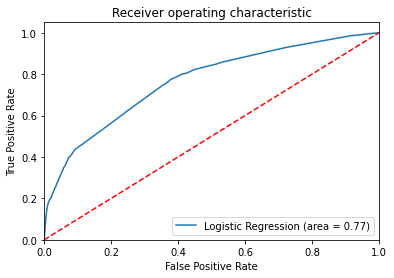

In [38]:
plot_roc_auc(glm_logit_results)

In [39]:
def odds_ratios(results):
    return np.exp(results.params)

In [40]:
odds_ratios(glm_logit_results)

const                                                            0.090826
Car                                                              1.111948
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     0.259777
Time_living_in_barri_MORE THAN 10 YEARS                          0.411877
Barri_satisfaction_FAIRLY SATISFIED                              3.208622
Barri_satisfaction_NOT SATISFIED                                 9.112454
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 3.820965
Barri_comparison_ONE OF THE WORST                               11.036380
Barri_transport_BAD                                              1.288321
Barri_transport_NEITHER BAD, NOR GOOD                            1.183121
dtype: float64

In [41]:
def pseudo_r2(results):
    return (1 - results.llf / results.llnull)

In [42]:
pseudo_r2(glm_logit_results)

0.15920408528491514

In [43]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3)

In [44]:
adj_count_r2(glm_logit_results)

0.085

In [62]:
1 - np.exp((glm_logit_results.llnull - glm_logit_results.llf)*(2/glm_logit_results.nobs))

0.10514541894174045

# Probit

In [45]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12748
Model Family:                                Binomial   Df Model:                            9
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3745.3
Date:                                Sun, 09 May 2021   Deviance:                       7490.6
Time:                                        16:54:10   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.3460      0.061    -22.185      0.000      -1.465      -1.227
Car                                                              0.0565      0.032      1.758      0.079      -0.006       0.119
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.7097      0.074     -9.576      0.000      -0.855      -0.564
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4680      0.058     -8.044      0.000      -0.582      -0.354
Barri_satisfaction_FAIRLY SATISFIED                              0.6576      0.045     14.463      0.000       0.568       0.747
Barri_satisfaction_NOT SATISFIED                                 1.2916      0.120     10.801      0.000       1.057       1.526
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.6717      0.034     19.546      0.000       0.604       0.739
Barri_comparison_ONE OF THE WORST                                1.3045      0.069     18.819      0.000       1.169       1.440
Barri_transport_BAD                                              0.1365      0.048      2.873      0.004       0.043       0.230
Barri_transport_NEITHER BAD, NOR GOOD                            0.0868      0.053      1.638      0.101      -0.017       0.191
================================================================================================================================
"""

In [46]:
glm_probit_results.aic

7510.640290749845

In [47]:
glm_probit_results.bic

-113027.85289286477

In [48]:
glm_classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,11238,102
1.0,1199,219


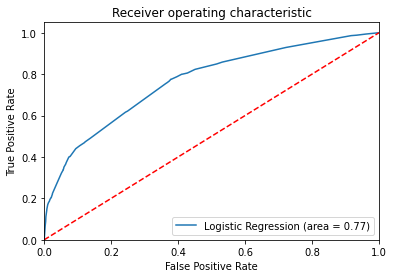

In [49]:
plot_roc_auc(glm_probit_results)

In [50]:
odds_ratios(glm_probit_results)

const                                                           0.260286
Car                                                             1.058111
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.491769
Time_living_in_barri_MORE THAN 10 YEARS                         0.626224
Barri_satisfaction_FAIRLY SATISFIED                             1.930148
Barri_satisfaction_NOT SATISFIED                                3.638512
Barri_comparison_NEITHER THE BEST, NOR THE WORST                1.957504
Barri_comparison_ONE OF THE WORST                               3.686011
Barri_transport_BAD                                             1.146309
Barri_transport_NEITHER BAD, NOR GOOD                           1.090690
dtype: float64

In [51]:
pseudo_r2(glm_probit_results)

0.1586053614139349

In [52]:
adj_count_r2(glm_probit_results)

0.083

# Scobit

In [53]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12748
Model Family:                                Binomial   Df Model:                            9
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3747.0
Date:                                Sun, 09 May 2021   Deviance:                       7494.0
Time:                                        16:54:11   Pearson chi2:                 1.27e+04
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5369      0.099    -25.570      0.000      -2.731      -2.342
Car                                                              0.1002      0.054      1.854      0.064      -0.006       0.206
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.1460      0.121     -9.447      0.000      -1.384      -0.908
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7301      0.087     -8.345      0.000      -0.902      -0.559
Barri_satisfaction_FAIRLY SATISFIED                              1.0186      0.066     15.487      0.000       0.890       1.148
Barri_satisfaction_NOT SATISFIED                                 1.6319      0.129     12.634      0.000       1.379       1.885
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.2713      0.067     19.055      0.000       1.141       1.402
Barri_comparison_ONE OF THE WORST                                2.0662      0.098     20.983      0.000       1.873       2.259
Barri_transport_BAD                                              0.2029      0.076      2.678      0.007       0.054       0.351
Barri_transport_NEITHER BAD, NOR GOOD                            0.1375      0.085      1.617      0.106      -0.029       0.304
================================================================================================================================
"""

In [54]:
glm_scobit_results.aic

7514.032538260228

In [55]:
glm_scobit_results.bic

-113024.46064535438

In [56]:
glm_classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,11233,107
1.0,1188,230


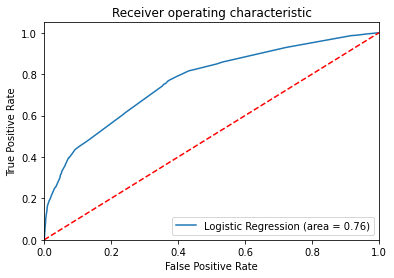

In [57]:
plot_roc_auc(glm_scobit_results)

In [58]:
odds_ratios(glm_scobit_results)

const                                                           0.079112
Car                                                             1.105372
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.317908
Time_living_in_barri_MORE THAN 10 YEARS                         0.481867
Barri_satisfaction_FAIRLY SATISFIED                             2.769330
Barri_satisfaction_NOT SATISFIED                                5.113354
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.565514
Barri_comparison_ONE OF THE WORST                               7.894639
Barri_transport_BAD                                             1.224941
Barri_transport_NEITHER BAD, NOR GOOD                           1.147351
dtype: float64

In [59]:
pseudo_r2(glm_scobit_results)

0.15822432337750458

In [60]:
adj_count_r2(glm_scobit_results)

0.087

In [61]:
print("AIC: ", glm_logit_results.aic, "BIC: ", glm_logit_results.bic)
print("AIC: ", glm_probit_results.aic, "BIC: ", glm_probit_results.bic)
print("AIC: ", glm_scobit_results.aic, "BIC: ", glm_scobit_results.bic)

AIC:  7505.3100628813445 BIC:  -113033.18312073327
AIC:  7510.640290749845 BIC:  -113027.85289286477
AIC:  7514.032538260228 BIC:  -113024.46064535438
